# 삼성전자 주식가격 분석

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:

# 2. 작업 순서
#   - 이 사이트의 내용을 웹크롤링으로 읽어와서, 전체 내용을 DataFrame으로 저장한다.
#   - 데이터 전처리를 한다.
#   - 데이터 시각화를 한다.

# 3. 웹 크롤링 수집 준비를 한다.
#   - user agent 등을 설정한다.

# 4. 데이터 전처리
#   - 숫자 데이터의 콤마를 없앤다.
#   - 숫자 형식의 문자열을 숫자 데이터로 변환한다.

# 5. 데이터 시각화 
#   - 그래픽 기본 설정을 한다. (한글, 폰트 크기, 그래프창 크기)
#   - DataFrame 데이터에서 종가만 추출하여 선그래프를 그린다.
#     => x축에는 “날짜”을 표시한다.
#     => y축에는 “금액”을 표시한다.
#     => 타이틀에는 “삼성전자 날짜별 주가 상황”을 표시한다.
#     => x축 tick문자는 날짜를 표시한다.

### 1.데이터 크롤링 해오기

In [3]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36'}
req = requests.get(url, headers=header)
html = req.text
soup = BeautifulSoup(req.text, 'html.parser')

### 2.원하는 부분 추출

In [4]:
trs = soup.select('.type2>tr')
len(trs)

16

In [5]:
tr= trs[2]
tr

<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td align="center"><span class="tah p10 gray03">2022.05.03</span></td>
<td class="num"><span class="tah p11">68,000</span></td>
<td class="num">
<img alt="상승" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" style="margin-right:4px;" width="7"/><span class="tah p11 red02">
				700
				</span>
</td>
<td class="num"><span class="tah p11">67,400</span></td>
<td class="num"><span class="tah p11">68,400</span></td>
<td class="num"><span class="tah p11">67,300</span></td>
<td class="num"><span class="tah p11">11,505,729</span></td>
</tr>

In [151]:
date = tr.select('td')[0].get_text()
date

'2022.05.02'

In [7]:
ep = tr.select('td')[1].get_text()
ep

'68,000'

In [8]:
mp = date = tr.select('td')[3].get_text()
mp


'67,400'

In [9]:
hp = date = tr.select('td')[4].get_text()
hp

'68,400'

In [10]:
lp = date = tr.select('td')[5].get_text()
lp

'67,300'

In [11]:
trad  = tr.select('td')[6].get_text()
trad

'11,505,729'

In [18]:
lines = []
for tr in trs[2:7]:
    date = tr.select('td')[0].get_text()
    ep = tr.select('td')[1].get_text()
    mp = tr.select('td')[3].get_text()
    hp = tr.select('td')[4].get_text()
    lp = tr.select('td')[5].get_text()
    trad  = tr.select('td')[6].get_text()
    lines.append([date,ep,mp,hp,lp,trad])

for tr in trs[10:15]:
    date = tr.select('td')[0].get_text()
    ep = tr.select('td')[1].get_text()
    mp = tr.select('td')[3].get_text()
    hp = tr.select('td')[4].get_text()
    lp = tr.select('td')[5].get_text()
    trad  = tr.select('td')[6].get_text()
    lines.append([date,ep,mp,hp,lp,trad])
    
lines

[['2022.05.03', '68,000', '67,400', '68,400', '67,300', '11,505,729'],
 ['2022.05.02', '67,300', '66,600', '67,600', '66,500', '14,106,184'],
 ['2022.04.29', '67,400', '65,100', '67,600', '65,000', '26,190,390'],
 ['2022.04.28', '64,800', '65,400', '65,500', '64,500', '16,895,527'],
 ['2022.04.27', '65,000', '65,400', '65,500', '64,900', '18,122,084'],
 ['2022.04.26', '66,100', '66,400', '66,700', '66,100', '12,946,923'],
 ['2022.04.25', '66,300', '66,500', '66,700', '66,300', '11,016,474'],
 ['2022.04.22', '67,000', '67,200', '67,300', '66,700', '11,791,478'],
 ['2022.04.21', '67,700', '67,600', '68,300', '67,500', '12,847,448'],
 ['2022.04.20', '67,400', '67,000', '67,400', '66,500', '16,693,293']]

### 3.데이터프레임 만들기

In [34]:
df = pd.DataFrame(lines,columns=['날짜','종가','시가','고가','저가','거래량'])
df.to_csv('삼성전자주가.csv',index=False)

### 4.데이터 전처리

In [ ]:
# 4. 데이터 전처리
#   - 숫자 데이터의 콤마를 없앤다.
#   - 숫자 형식의 문자열을 숫자 데이터로 변환한다.

In [35]:
samsung = pd.read_csv('삼성전자주가.csv', thousands=',')
samsung

,날짜,종가,시가,고가,저가,거래량
0,2022.05.03,68000,67400,68400,67300,11505729
1,2022.05.02,67300,66600,67600,66500,14106184
2,2022.04.29,67400,65100,67600,65000,26190390
3,2022.04.28,64800,65400,65500,64500,16895527
4,2022.04.27,65000,65400,65500,64900,18122084
5,2022.04.26,66100,66400,66700,66100,12946923
6,2022.04.25,66300,66500,66700,66300,11016474
7,2022.04.22,67000,67200,67300,66700,11791478
8,2022.04.21,67700,67600,68300,67500,12847448
9,2022.04.20,67400,67000,67400,66500,16693293


In [36]:
samsung.dtypes

날짜     object
종가      int64
시가      int64
고가      int64
저가      int64
거래량     int64
dtype: object

### 5.데이터 시각화

In [ ]:
# 5. 데이터 시각화 
#   - 그래픽 기본 설정을 한다. (한글, 폰트 크기, 그래프창 크기)
#   - DataFrame 데이터에서 종가만 추출하여 선그래프를 그린다.
#     => x축에는 “날짜”을 표시한다.
#     => y축에는 “금액”을 표시한다.
#     => 타이틀에는 “삼성전자 날짜별 주가 상황”을 표시한다.
#     => x축 tick문자는 날짜를 표시한다.

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family'] = 'Malgun Gothic'

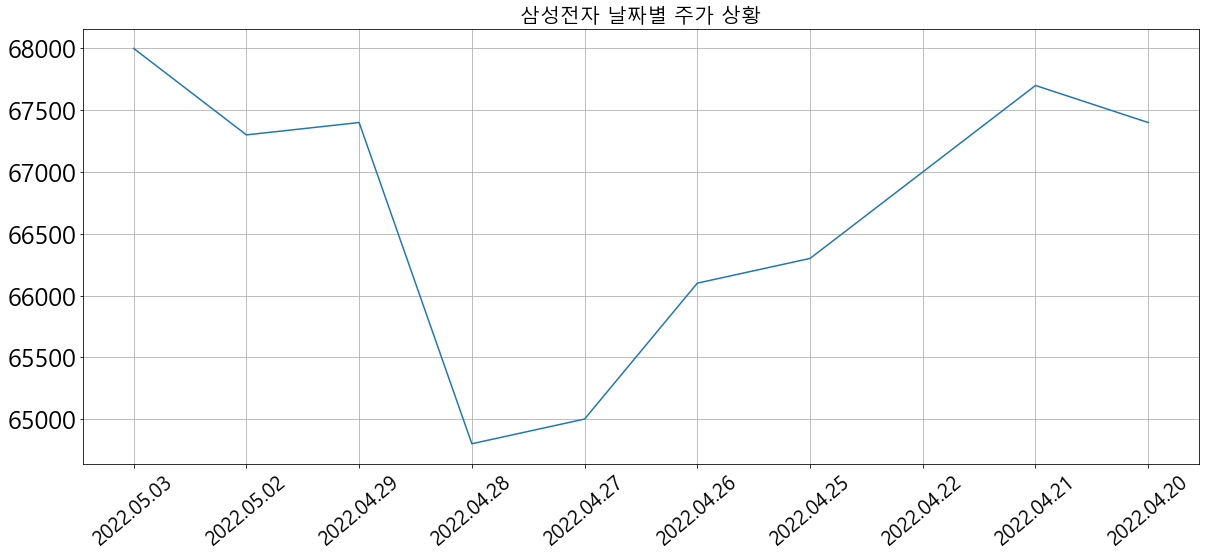

In [62]:
plt.figure(figsize=(20,8))
plt.plot(samsung.날짜,samsung.종가)
plt.title('삼성전자 날짜별 주가 상황',fontsize=20)
plt.xticks(rotation=40,fontsize=20)
plt.yticks(fontsize=25)
plt.grid()
